# Figure 2

In Figure 2, we show nonlinear, high-order epistasis fits for all data sets.

# Data set I

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import epistasis.models.nonlinear.power as power
import json

from gpmap import GenotypePhenotypeMap
from epistasis import pyplot
from epistasis.models.nonlinear.power import EpistasisPowerTransform
from epistasis.models.nonlinear.ordinary import EpistasisNonlinearRegression
from epistasis.models.linear import EpistasisLinearRegression
from epistasis.models.linear import EpistasisElasticNet,EpistasisLasso
from epistasis.models.nonlinear.ordinary import EpistasisNonlinearRegression
from epistasis.models.pipeline import EpistasisPipeline 

path = "../datasets/"
plt.rcParams.update({'font.size': 16})

In [2]:
# Load dataset
dataset = path + "krug1.json"

# Import dataset
filename = dataset
with open(filename, "r") as f:
    data_json = json.load(f)

# Print json keys
print(data_json.keys())
gpm = GenotypePhenotypeMap(wildtype=data_json["wildtype"],
                           genotypes=data_json["genotypes"],
                           phenotypes= (data_json["phenotypes"]),
                           stdeviations=data_json["stdeviations"],
                          n_replicates=data_json["n_replicates"])

dict_keys(['figure', 'authors', 'wildtype', 'log_transform', 'stdeviations', 'filename', 'genotypes', 'journal', 'mutations', 'n_replicates', 'phenotypes', 'replicate 1', 'replicate 2', 'title', 'url'])


In [3]:
errors = np.vstack((gpm.err.upper[1:],gpm.err.lower[1:]))

In [4]:
# Fit high-order epistasis in linear phenotypes
rsq = []

for order in range(1,6):
    linear = EpistasisPipeline([
      EpistasisPowerTransform(lmbda=-1, A=1, B=0),
      EpistasisLinearRegression(order=order)])    

    linear.add_gpm(gpm)
    linear.fit()
    rsq.append(linear.score())

In [5]:
linear[0].parameters

name,value,standard error,relative error,initial value,min,max,vary
lmbda,-4.25356440,173.212691,(4072.18%),-1,-inf,inf,True
A,0.67621306,47.8936912,(7082.63%),1,-0.64221875,inf,True
B,-0.56630517,337.420606,(59582.82%),0,-inf,inf,True


[0.7051254774505236, 0.7871846275676627, 0.8702867071791803, 0.9214898765493013, 0.9724337780017022]
[0.7051254774505236, 0.08205915011713916, 0.08310207961151761, 0.05120316937012093, 0.05094390145240091]


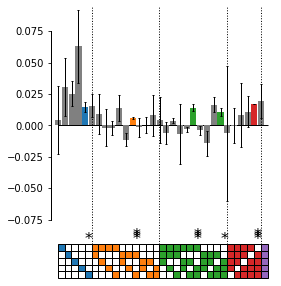

In [6]:
# Plot the coefs
#plot.coefs(linear.epistasis.values, linear.epistasis.sites, figsize=(4,5))
fig,ax = pyplot.plot_coefs(model=linear[1],sigmas=1,errors=errors, figsize=(4,5))

# Plot the fraction explained
frac_ex = [rsq[0]] + [rsq[i+1] - rsq[i] for i, r in enumerate(rsq[1:])]
print(rsq)
print(frac_ex)
fig.savefig("../figures/krug1_coef.pdf", format='pdf', transparent=True, dpi=500, pad_inches = 0)

# Data set II

dict_keys(['figure', 'title', 'authors', 'description', 'url', 'journal', 'wildtype', 'log_transform', 'mutations', 'genotypes', 'phenotypes', 'stdeviations', 'n_replicates'])
[0.9396217052606894, 0.9786200452739139, 0.9902383462616985, 0.9992145850478218, 0.9998845589222102]
[0.9396217052606894, 0.03899834001322444, 0.011618300987784602, 0.008976238786123303, 0.0006699738743883854]


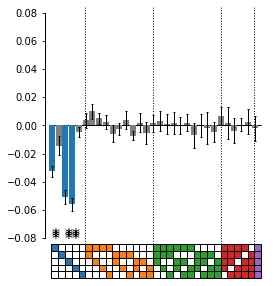

In [7]:
dataset = path + "khan.json"
# Import dataset
filename = dataset
with open(filename, "r") as f:
    data_json = json.load(f)

# Print json keys
print(data_json.keys())
gpm = GenotypePhenotypeMap(wildtype=data_json["wildtype"],
                           genotypes=data_json["genotypes"],
                           phenotypes= (data_json["phenotypes"]),
                           stdeviations=data_json["stdeviations"],
                          n_replicates=data_json["n_replicates"])
errors = np.vstack((gpm.err.upper[1:],gpm.err.lower[1:]))
# Fit high-order epistasis in linear phenotypes
rsq = []

for order in range(1,6):
    linear = EpistasisPipeline([
      EpistasisPowerTransform(lmbda=1, A=0, B=0),
      EpistasisLinearRegression(order=order)])    

    linear.add_gpm(gpm)
    linear.fit()
    rsq.append(linear.score())
# Plot the coefs
fig,ax = pyplot.plot_coefs(model=linear[1],sigmas=1,errors=errors, figsize=(4,5))

# Plot the fraction explained
frac_ex = [rsq[0]] + [rsq[i+1] - rsq[i] for i, r in enumerate(rsq[1:])]
print(rsq)
print(frac_ex)
fig.savefig("../figures/khan_coef.pdf", format='pdf', transparent=True, dpi=500, pad_inches = 0)

## Data set III

dict_keys(['authors', 'columns', 'description', 'errors', 'figure', 'filename', 'genotypes', 'journal', 'log_transform', 'mutations', 'n_replicates', 'phenotypes', 'rank', 'replicate 1', 'replicate 2', 'replicate 3', 'stdeviations', 'title', 'url', 'wildtype'])


D:\Anaconda3\lib\site-packages\epistasis\models\nonlinear\power.py:54: RuntimeWarning: invalid value encountered in power
  first = (x + A)**lmbda


[0.8916161173200029, 0.9195940666905595, 0.9383344292272628, 0.9922084119491671, nan]
[0.8916161173200029, 0.027977949370556643, 0.018740362536703303, 0.053873982721904246, nan]


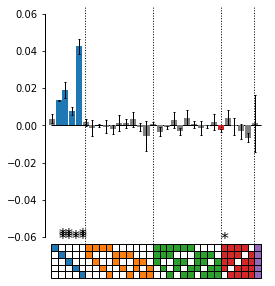

In [8]:
dataset = path + "weinreich.json"

# Import dataset
filename = dataset
with open(filename, "r") as f:
    data_json = json.load(f)

# Print json keys
print(data_json.keys())
data_json["phenotypes"] =  - np.log(data_json["phenotypes"] )
gpm = GenotypePhenotypeMap(wildtype=data_json["wildtype"],
                           genotypes=data_json["genotypes"],
                           phenotypes= (data_json["phenotypes"]),
                           stdeviations=data_json["stdeviations"],
                          n_replicates=data_json["n_replicates"])
errors = np.vstack((gpm.err.upper[1:],gpm.err.lower[1:]))
# Fit high-order epistasis in linear phenotypes
rsq = []

for order in range(1,6):
    linear = EpistasisPipeline([
      EpistasisPowerTransform(lmbda=1, A=0, B=0),
      EpistasisLinearRegression(order=order)])    

    linear.add_gpm(gpm)
    linear.fit()
    rsq.append(linear.score())
# Plot the coefs
fig,ax = pyplot.plot_coefs(model=linear[1],sigmas=1,errors=errors, figsize=(4,5))

# Plot the fraction explained
frac_ex = [rsq[0]] + [rsq[i+1] - rsq[i] for i, r in enumerate(rsq[1:])]
print(rsq)
print(frac_ex)
fig.savefig("../figures/weinreich_coef.pdf", format='pdf', transparent=True, dpi=500, pad_inches = 0)

## Data set IV

Data set IV was published as $\Delta G$s, but were given to us as $k_a$s. Before fitting with a nonlinear epistasis model, we converted the values to $\Delta G$s to be consistent with the literature.

dict_keys(['figure', 'authors', 'log_transform', 'columns', 'stdeviations', 'filename', 'genotypes', 'journal', 'mutations', 'phenotypes', 'replicate 1', 'replicate 2', 'replicate 3', 'title', 'url', 'wildtype', 'n_replicates'])
[[8.69665751e-08 4.10960934e-07 3.39585804e-06 9.90252493e-07
  3.45264257e-06 4.46590292e-07 1.11415472e-06 7.89697551e-07
  2.90835323e-07 1.57356872e-06 8.48685258e-07 1.55777619e-08
  2.33196627e-07 3.94182981e-07 5.96716261e-07 1.39867662e-08
  1.91311265e-08 4.75636026e-08 1.05022044e-08 3.77280719e-08
  6.21330711e-08 5.73488351e-09 2.82488938e-08 9.68771654e-09
  7.33590864e-08 1.40659821e-08 2.01457651e-08 4.49691252e-09
  2.37268406e-09 3.68178701e-09 2.43857882e-08 1.90484178e-06
  1.03237949e-06 3.52337275e-06 5.10801331e-06 7.62589497e-06
  2.60904978e-06 4.45941949e-06 3.60820156e-06 9.25065884e-06
  7.84861394e-07 2.45399599e-06 3.60535815e-06 4.05024279e-07
  9.53325563e-07 5.76090721e-07 1.72337524e-06 2.85704198e-06
  3.26691949e-06 4.25968265

D:\Anaconda3\lib\site-packages\epistasis\models\nonlinear\power.py:54: RuntimeWarning: invalid value encountered in power
  first = (x + A)**lmbda


[0.7075429462352608, nan, 0.9654696806782639, 0.994701868215507, 0.9965617048669905]
[0.7075429462352608, nan, nan, 0.029232187537243104, 0.0018598366514834819]


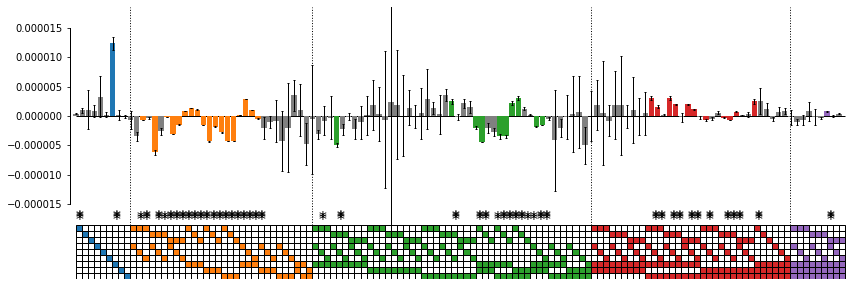

In [9]:
dataset = path + "anderson.json"

# gas constant and temperature
R = 1.9872036e-3
T = 293

# Import dataset
filename = dataset
with open(filename, "r") as f:
    data_json = json.load(f)

# Print json keys
print(data_json.keys())
#data_json["phenotypes"] =  - np.log(data_json["phenotypes"] )#*R*T
data_json["phenotypes"] =  np.array(data_json["phenotypes"] )

gpm = GenotypePhenotypeMap(wildtype=data_json["wildtype"],
                           genotypes=data_json["genotypes"],
                           phenotypes= (data_json["phenotypes"]),
                           stdeviations=data_json["stdeviations"],
                          n_replicates=data_json["n_replicates"])
errors = (np.vstack((gpm.err.upper[1:],gpm.err.lower[1:])))
# Fit high-order epistasis in linear phenotypes

print(errors)
rsq = []

for order in range(1,6):
    linear = EpistasisPipeline([
      EpistasisPowerTransform(lmbda=1, A=-0.5, B=2),
      EpistasisLinearRegression(order=order)])    

    linear.add_gpm(gpm)
    linear.fit()
    rsq.append(linear.score())
# Plot the coefs
fig,ax = pyplot.plot_coefs(model=linear[1],sigmas=1,significance_cutoff = 0.0001,errors=errors, figsize=(14,5))
# Plot the fraction explained
frac_ex = [rsq[0]] + [rsq[i+1] - rsq[i] for i, r in enumerate(rsq[1:])]
print(rsq)
print(frac_ex)
fig.savefig("../figures/anderson_coef.pdf", format='pdf', transparent=True, dpi=500, pad_inches = 0)